<a href="https://colab.research.google.com/github/nevilshah444/CMPE-255-Data-Cleaning-Assignment/blob/main/CMPE_255_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step  1 :- **Connecting this Google Colab to my Google Drive**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


# **Importing the necessary libraries**

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
sns.set()
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# **Importing the Dataset for further analysis**

Let's have a glimpse of how the dataset looks like!! 

In [3]:
Data = pd.read_csv('/content/gdrive/My Drive/dataset/hotel_bookings.csv')
Data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
Data.shape #returns the number of rows and columns of the dataset

(119390, 32)

In [5]:
#Lets take a look at the name of the columns in this dataset
Data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
#the Columns name are a bit complex and confusing. Let's  change the name of all the columns.
Data.columns = ['Name', 'Canceled', 'LeadTime', 'ArrivalYear', 'ArrivalMonth', 'ArrivalWeek','ArrivingDay', 'WeekendStays',
              'WeekdayStays', 'Adults', 'Children', 'Babies', 'Meal','Country', 'Segment', 'Distribution_Channel','RepeatGuest', 'PreviousCancel',
              'PreviousBook', 'Booked_RoomType','Assigned_RoomType', 'ChangedBooking', 'DepositType','agent', 'company', 'WaitingDays', 'CustomerType', 'ADR','ParkingSpace', 'SpecialRequests',
              'Status', 'ReservationDate']

In [7]:
Data.dtypes #returns the datatype of each  and every column

Name                     object
Canceled                  int64
LeadTime                  int64
ArrivalYear               int64
ArrivalMonth             object
ArrivalWeek               int64
ArrivingDay               int64
WeekendStays              int64
WeekdayStays              int64
Adults                    int64
Children                float64
Babies                    int64
Meal                     object
Country                  object
Segment                  object
Distribution_Channel     object
RepeatGuest               int64
PreviousCancel            int64
PreviousBook              int64
Booked_RoomType          object
Assigned_RoomType        object
ChangedBooking            int64
DepositType              object
agent                   float64
company                 float64
WaitingDays               int64
CustomerType             object
ADR                     float64
ParkingSpace              int64
SpecialRequests           int64
Status                   object
Reservat

In [8]:
#Lets look at some of the Statistics of the columns in this dataset
Data.describe()

,Canceled,LeadTime,ArrivalYear,ArrivalWeek,ArrivingDay,WeekendStays,WeekdayStays,Adults,Children,Babies,RepeatGuest,PreviousCancel,PreviousBook,ChangedBooking,agent,company,WaitingDays,ADR,ParkingSpace,SpecialRequests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


#                                       **Data Cleaning:Handling NA values**
There are multiple ways to clean the data in a dataset:

1)Dropping the missing data(if dropping the values does not impact the data)

2)Replacing the missing values with statistical measures (mean, sum, median,etc)

3)Using the forward or Backward fill methods to fill the missing values

4)Imputing with more complex machine learning methods 

In [9]:
#lets take a look over the number of null (NA) values in each column
Data.isna().sum()

Name                         0
Canceled                     0
LeadTime                     0
ArrivalYear                  0
ArrivalMonth                 0
ArrivalWeek                  0
ArrivingDay                  0
WeekendStays                 0
WeekdayStays                 0
Adults                       0
Children                     4
Babies                       0
Meal                         0
Country                    488
Segment                      0
Distribution_Channel         0
RepeatGuest                  0
PreviousCancel               0
PreviousBook                 0
Booked_RoomType              0
Assigned_RoomType            0
ChangedBooking               0
DepositType                  0
agent                    16340
company                 112593
WaitingDays                  0
CustomerType                 0
ADR                          0
ParkingSpace                 0
SpecialRequests              0
Status                       0
ReservationDate              0
dtype: i

In [10]:
#Calculating the percentage of null values in each dataset
print(round(100*(Data.isnull().sum()/len(Data.index)),5))
#round upto 5 decimal points

Name                     0.00000
Canceled                 0.00000
LeadTime                 0.00000
ArrivalYear              0.00000
ArrivalMonth             0.00000
ArrivalWeek              0.00000
ArrivingDay              0.00000
WeekendStays             0.00000
WeekdayStays             0.00000
Adults                   0.00000
Children                 0.00335
Babies                   0.00000
Meal                     0.00000
Country                  0.40874
Segment                  0.00000
Distribution_Channel     0.00000
RepeatGuest              0.00000
PreviousCancel           0.00000
PreviousBook             0.00000
Booked_RoomType          0.00000
Assigned_RoomType        0.00000
ChangedBooking           0.00000
DepositType              0.00000
agent                   13.68624
company                 94.30689
WaitingDays              0.00000
CustomerType             0.00000
ADR                      0.00000
ParkingSpace             0.00000
SpecialRequests          0.00000
Status    

Conclusion:-

The Columns named 'Company' and 'Agent' have the most number of missing values with 94.3% and 13.68% respectively. 

Additionally, the columns 'Children ' and 'Country ' have a few missing values.

Lets Start with data cleaning !!

In [11]:
Data = Data.drop(['company'], axis = 1) # Dropping the column  as majority of this column is empty

In [12]:
Data = Data.drop(['agent'], axis = 1) # as a portion of the values in this column is missing and this column will not be required for further analysis

In [13]:
#There are 4 records missing in the "children " column, hence we will fill the value using the statistical 'mean'
Data["Children"].fillna(value = Data["Children"].mean(), inplace=True)
Data["Children"] = Data["Children"].apply(np.floor)

In [14]:
#Now, there are about 388 records in the 'country' column whose data is missing. Here we have a total of about 120k  records, so we will remove these 338 records , as there seems no other way to fill these records
Data = Data.dropna(axis = 0)

In [15]:
Data.isnull().sum()

Name                    0
Canceled                0
LeadTime                0
ArrivalYear             0
ArrivalMonth            0
ArrivalWeek             0
ArrivingDay             0
WeekendStays            0
WeekdayStays            0
Adults                  0
Children                0
Babies                  0
Meal                    0
Country                 0
Segment                 0
Distribution_Channel    0
RepeatGuest             0
PreviousCancel          0
PreviousBook            0
Booked_RoomType         0
Assigned_RoomType       0
ChangedBooking          0
DepositType             0
WaitingDays             0
CustomerType            0
ADR                     0
ParkingSpace            0
SpecialRequests         0
Status                  0
ReservationDate         0
dtype: int64

There is no need for records where the number of the people in a booking is 0. So we will delete  such records.

In [16]:
Guests1 = list(Data.loc[Data["Adults"]
                   + Data["Children"]
                   + Data["Babies"]==0].index)
Data.drop(Guests1,inplace=True)

**Conclusion:-**

Here, We have removed all the missing values from the dataset and hence, we conclude with the cleaning process and move with the next step.

In [17]:
#resetting the index 
Data.reset_index()

#**Outlier Mining**

Outliers is ,basically,  an extreme value that deviates from the other observation. Removal of outliers is extremely important for attaining better results.

First, Let's determine the outliers in the columns of the dataset.

In [18]:
# Determining the outliers in a statistical manner
numvar = ['LeadTime', 'WeekendStays', 'Adults','Children', 'WeekdayStays', 'Babies','ADR','SpecialRequests','ParkingSpace']
Data[numvar].describe()

,LeadTime,WeekendStays,Adults,Children,WeekdayStays,Babies,ADR,SpecialRequests,ParkingSpace
count,118732.000000,118732.000000,118732.000000,118732.000000,118732.000000,118732.000000,118732.000000,118732.00000,118732.000000
mean,104.397896,0.928301,1.861065,0.104353,2.500910,0.007959,102.131000,0.57180,0.061913
std,106.915104,0.992720,0.574697,0.399432,1.889086,0.097448,50.390757,0.79274,0.244226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.00000,0.000000
25%,18.000000,0.000000,2.000000,0.000000,1.000000,0.000000,70.000000,0.00000,0.000000
50%,70.000000,1.000000,2.000000,0.000000,2.000000,0.000000,95.000000,0.00000,0.000000
75%,161.000000,2.000000,2.000000,0.000000,3.000000,0.000000,126.000000,1.00000,0.000000
max,737.000000,16.000000,55.000000,10.000000,40.000000,10.000000,5400.000000,5.00000,8.000000


There is huge difference between the mean value and the maximum value of most of the columns and these values are outliers, which needs to be processed in a proper manner 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

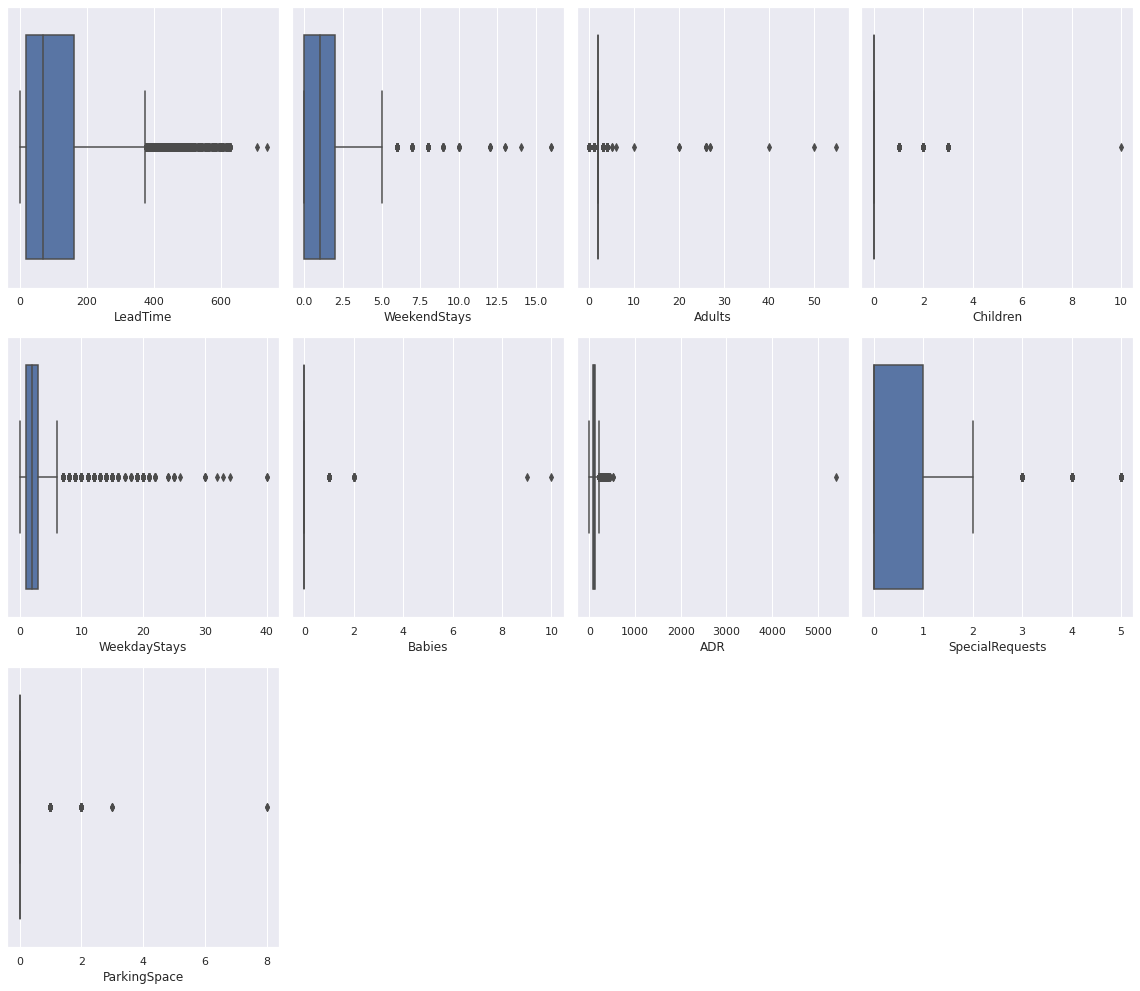

In [19]:
# Displaying the outliers in a Graphical way
n = 1
plt.figure(figsize=(16,18))
for feature in numvar:
    plt.subplot(4,4,n)
    sns.boxplot(Data[feature])
    n+=1
    plt.tight_layout()

The dots displayed in the boxplots of the columns are the outliers.

Now, we will clean the outliers.

In [20]:
#Cleaning the outliers
Data.loc[Data.LeadTime > 200,'LeadTime']=200
Data.loc[Data.WeekendStays> 4,'WeekendStays']=4
Data.loc[Data.Adults > 5,'Adults']=5
Data.loc[Data.Children > 2,'Children']=2
Data.loc[Data.WeekdayStays > 5,'WeekdayStays']=5
Data.loc[Data.ADR > 250,'ADR']=250
Data.loc[Data.SpecialRequests > 2,'SpecialRequests ']=2
Data.loc[Data.ParkingSpace > 2,'ParkingSpace']=2

In [21]:
Data[numvar].describe()

,LeadTime,WeekendStays,Adults,Children,WeekdayStays,Babies,ADR,SpecialRequests,ParkingSpace
count,118732.000000,118732.000000,118732.000000,118732.000000,118732.000000,118732.000000,118732.000000,118732.00000,118732.000000
mean,88.007151,0.921116,1.858412,0.103645,2.367736,0.007959,101.739172,0.57180,0.061786
std,73.556075,0.956417,0.484203,0.394568,1.442575,0.097448,46.667200,0.79274,0.241919
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.00000,0.000000
25%,18.000000,0.000000,2.000000,0.000000,1.000000,0.000000,70.000000,0.00000,0.000000
50%,70.000000,1.000000,2.000000,0.000000,2.000000,0.000000,95.000000,0.00000,0.000000
75%,161.000000,2.000000,2.000000,0.000000,3.000000,0.000000,126.000000,1.00000,0.000000
max,200.000000,4.000000,5.000000,2.000000,5.000000,10.000000,250.000000,5.00000,2.000000


Finally, from the above table, we can conclude that the "**Outlier Mining**" process is over.

Now , we will move towards the analysis step, **EDA**

# Exploratory Data Analysis
Here, we will look for some general conclusions and summary among the different columns of the dataset.

Let's  start with the basic overview of the dataset

In [22]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118732 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Name                  118732 non-null  object 
 1   Canceled              118732 non-null  int64  
 2   LeadTime              118732 non-null  int64  
 3   ArrivalYear           118732 non-null  int64  
 4   ArrivalMonth          118732 non-null  object 
 5   ArrivalWeek           118732 non-null  int64  
 6   ArrivingDay           118732 non-null  int64  
 7   WeekendStays          118732 non-null  int64  
 8   WeekdayStays          118732 non-null  int64  
 9   Adults                118732 non-null  int64  
 10  Children              118732 non-null  float64
 11  Babies                118732 non-null  int64  
 12  Meal                  118732 non-null  object 
 13  Country               118732 non-null  object 
 14  Segment               118732 non-null  object 
 15  

We have about 119k records after completing the cleaning process 

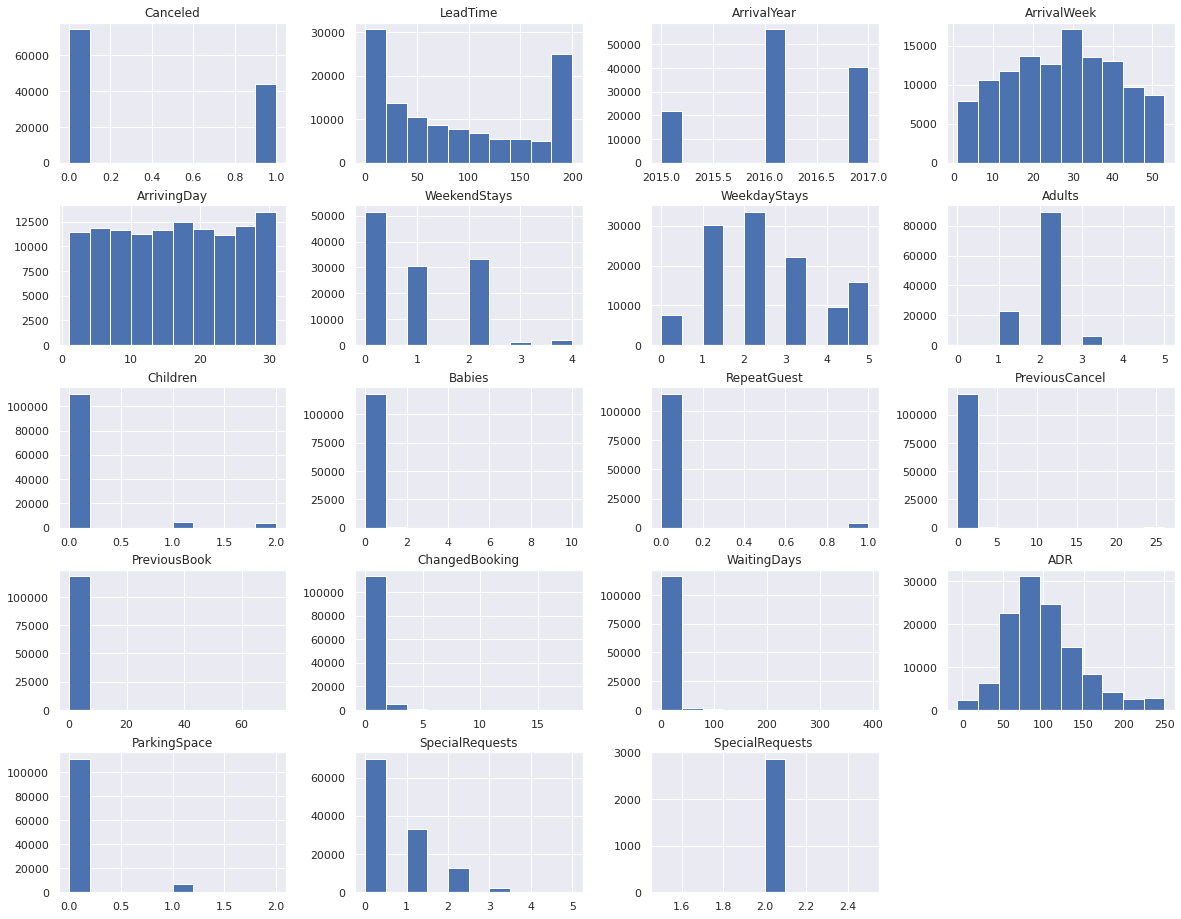

In [23]:
Data.hist(figsize=(20,16))
plt.show()
#having a general overview of the columns in the form of a histogram. 

In [24]:
Data.groupby(['Name'])['ChangedBooking'].sum()

Name
City Hotel      14567
Resort Hotel    11414
Name: ChangedBooking, dtype: int64

       Total number of Bookings


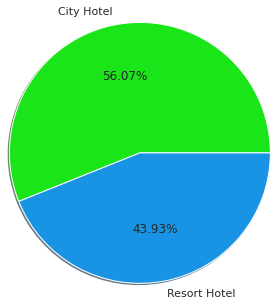

In [25]:
mylabels = ["City Hotel", "Resort Hotel"]
plt.figure(figsize=(3, 3))
mycolor = ['#19E519', '#1994E5']
print('       Total number of Bookings')
Data.groupby(['Name'])['ChangedBooking'].sum().plot.pie(radius = 2, colors = mycolor, labels = mylabels,autopct='%1.2f%%' , shadow = True)
plt.show()

#**Conclusion:**

The number of guest bookings is more at City Hotel as compared to Resort Hotel (56.07 % and 43.93% respectively). This shows that **people prefer 'City Hotel' more tha 'Resort Hotel'**

# Number of special requests made by customers in their booking 

Text(0.5, 1.0, 'Total Special Request')

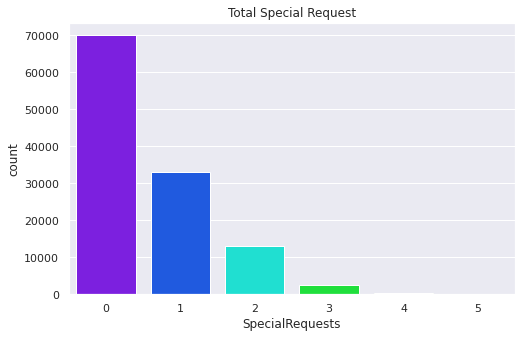

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='SpecialRequests', data=Data, palette = 'gist_rainbow_r')
plt.title('Total Special Request')

Conclusion:- 

Majority of the people do not prefer to make any special requests in their booking.

# How many Bookings were cancelled with respect to each hotel?

{1: 'Not Cancelled'

 0: 'Cancelled}'

Text(0.5, 1.0, 'Booking Cancelled')

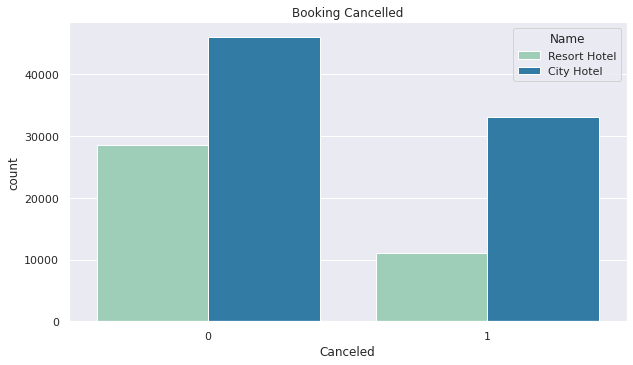

In [27]:
plt.figure(figsize=(10,5.5))
sns.countplot(x='Canceled', data=Data, palette = 'YlGnBu',hue='Name')
plt.title('Booking Cancelled')

Conclusion:-

Majority portion of bookings were proceeded as planned earlier , but about a total of about 40k bookings ,among both the hotels, were cancelled at the last moment .

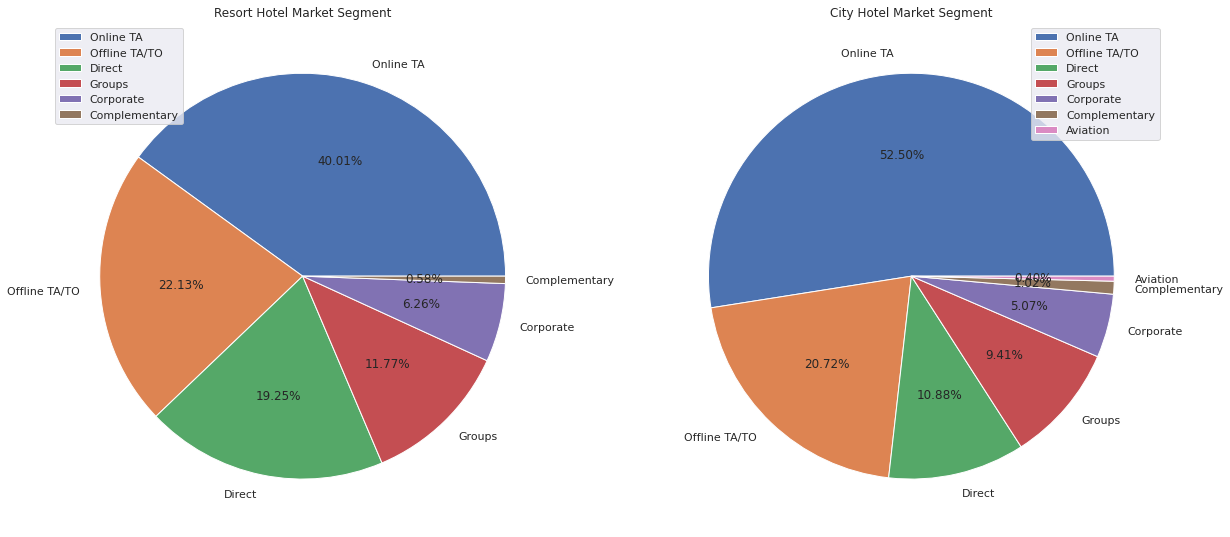

In [28]:
City = Data[(Data['Name']== 'City Hotel')  & (Data['Canceled']==0)]
Resort = Data[(Data['Name']== 'Resort Hotel')  & (Data['Canceled']==0)]

CitySegment=City.Segment.value_counts()
ResortSegment=Resort.Segment.value_counts()

plt.figure(figsize=(20,16))
plt.subplot(1,2,1)
plt.pie(ResortSegment,labels=ResortSegment.index,autopct='%.2f%%')
plt.title('Resort Hotel Market Segment')
plt.legend(loc ="upper left")

plt.subplot(1,2,2)
plt.pie(CitySegment,labels=CitySegment.index,autopct='%.2f%%')
plt.title('City Hotel Market Segment')
plt.legend(loc ="upper right")

Conclusion :

For the both types of Hotels, the "Online Trading Area(TA)" market segment has the highest proportion of booking among all.


# On an average basis,How many people in total were there in a single booking?



Text(0.5, 1.0, 'Number of people per booking')

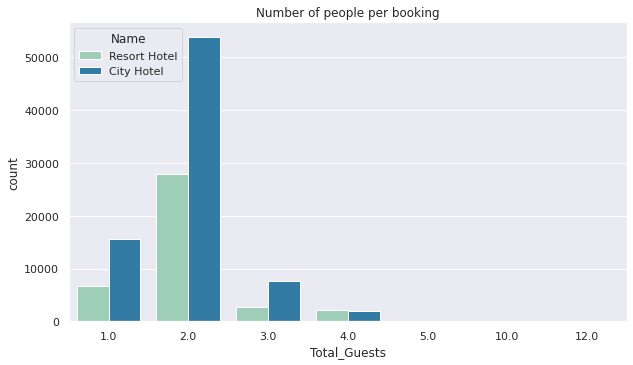

In [29]:
# To calculate total number of guests in a booking, Add the number of adults , children and babies for a particular booking.
Data['Total_Guests'] = Data['Adults'] + Data['Children'] + Data['Babies'] 

plt.figure(figsize=(10,5.5))
sns.countplot(x='Total_Guests', data=Data, palette = 'YlGnBu',hue='Name')
plt.title('Number of people per booking')

Conclusion:- 

For both City Hotel and Resort Hotel, there are 2 people in a family for maximum number of bookings.

In [30]:
#collecting the city hotel and Resort hotel data indifferent individual groups
City = Data[(Data['Name']== 'City Hotel')  & (Data['Canceled']==0)]
Resort = Data[(Data['Name']== 'Resort Hotel')  & (Data['Canceled']==0)]


# Among the  four categories, what is the most common type of the booking :

a)Transient

b)Contract

c)Group

d)Transient-party

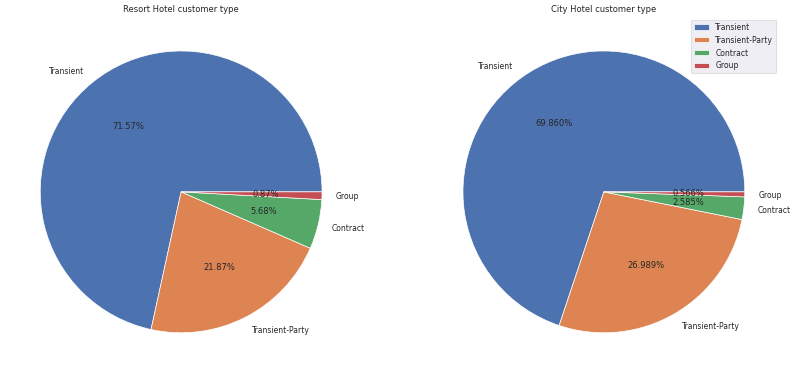

In [31]:
CitySegment=City.CustomerType.value_counts()
ResortSegment=Resort.CustomerType.value_counts()
plt.figure(figsize=(20,16),dpi= 50)

plt.subplot(1,2,1)
plt.pie(ResortSegment,labels=ResortSegment.index,autopct='%.2f%%')
plt.title('Resort Hotel customer type')
plt.subplot(1,2,2)
plt.pie(CitySegment,labels=CitySegment.index,autopct='%.3f%%')
plt.title('City Hotel customer type')
plt.legend()

Conclusion:- 

From the above pie chart, it seems that among the four categories , the "transient" is very common in all the bookings .

From all the countries, name the country which has the maximum number of visitors coming into these hotels?



In [32]:
number  = Data[Data['Canceled'] == 0].groupby(['Country']).size().reset_index(name = 'Total_Count')
number.head()
# Data.head(5)
import plotly.express as px

px.choropleth(number,
                    locations = "Country",
                    hover_name= "Country",
                    color= "Total_Count" , 
                    title = 'Visitor count from different countries',
                    color_continuous_scale="magenta"

                    )

Conclusion:- 

The majority of the people  visiting the City Hotel and the Resort Hotel are native to **"Portugal"**  with the total person count of 21k.

#Data Preprocessing :-

The next step after EDA comes Data preprocessing. Here, we will play with columns and will remove the columns that are not necessary  for training the model. 

In [33]:
Data.head(5)

,Name,Canceled,LeadTime,ArrivalYear,ArrivalMonth,ArrivalWeek,ArrivingDay,WeekendStays,WeekdayStays,Adults,Children,Babies,Meal,Country,Segment,Distribution_Channel,RepeatGuest,PreviousCancel,PreviousBook,Booked_RoomType,Assigned_RoomType,ChangedBooking,DepositType,WaitingDays,CustomerType,ADR,ParkingSpace,SpecialRequests,Status,ReservationDate,SpecialRequests,Total_Guests
0,Resort Hotel,0,200,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,NaN,2.0
1,Resort Hotel,0,200,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,NaN,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,NaN,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,NaN,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,NaN,2.0


In [34]:
# Removing the unnecessary columns
Data.drop(columns = ["ReservationDate","RepeatGuest",
"PreviousCancel",
"PreviousBook","Status" ],inplace = True ,axis = 1)

In [35]:
#creating a new column which combines Arrival year, date and month.
Data['ArrivalDate'] = pd.to_datetime(Data.ArrivalYear.astype(str) + '/' + Data.ArrivalMonth.astype(str) + '/' + Data.ArrivingDay.astype(str))

In [36]:
Data.drop(columns=["ArrivalYear", "ArrivalMonth", "ArrivingDay", "ArrivalWeek"],
            inplace=True, axis=1)
Data.drop(columns = ["SpecialRequests"],inplace = True ,axis = 1)

In [39]:
# Rows and Columns
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118731 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Name                  118731 non-null  object        
 1   Canceled              118731 non-null  int64         
 2   LeadTime              118731 non-null  int64         
 3   WeekendStays          118731 non-null  int64         
 4   WeekdayStays          118731 non-null  int64         
 5   Adults                118731 non-null  int64         
 6   Children              118731 non-null  float64       
 7   Babies                118731 non-null  int64         
 8   Meal                  118731 non-null  object        
 9   Country               118731 non-null  object        
 10  Segment               118731 non-null  object        
 11  Distribution_Channel  118731 non-null  object        
 12  Booked_RoomType       118731 non-null  object        
 13 

#**Data Modelling**

In [40]:
#identifying numerical and categorical variables
numvar = ['LeadTime', 'WeekendStays', 'WeekdayStays','Adults', 'Babies','ADR','ParkingSpace','Total_Guests']
catvar = ['Country','Children', 'Babies', 'Meal', 'Distribution_Channel']

In [41]:
#Encoding the columns
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()

for i in catvar :
    Data[i] = label_encoder.fit_transform(Data[i])

In [42]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 

In [43]:
features = numvar + catvar
X=Data[features]
y=Data['Canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [44]:
random_forest = RandomForestRegressor(n_estimators = 200, random_state = 42)
random_forest.fit(X_train,y_train)
y_pred_random_forest = random_forest.predict(X_test)
print(confusion_matrix(y_test,y_pred_random_forest.round()))
print(classification_report(y_test,y_pred_random_forest.round()))

[[16596  1930]
 [ 2995  8162]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     18526
           1       0.81      0.73      0.77     11157

    accuracy                           0.83     29683
   macro avg       0.83      0.81      0.82     29683
weighted avg       0.83      0.83      0.83     29683



Conclusion:-
Accuracy:- 83%

In [45]:
#random forest classifier model

def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
print('Model: Random Forest\n')
model(RandomForestClassifier(), X_train, X_test, y_train, y_test)

Model: Random Forest

Accuracy Score: 0.8321935114375232

Confusion Matrix:
 [[16673  1853]
 [ 3128  8029]]


Accuracy : 83%

References:-

1)https://www.kaggle.com/jessemostipak/hotel-booking-demand

2)https://www.kaggle.com/avi111297/complete-eda-pred-cancel-of-booking-94-21-acc

3)https://www.kaggle.com/duygut/eda-booking-cancelation-prediction

4)https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/

5)https://stackoverflow.com/questions/26660313/pandas-location-of-a-row-with-error

6)https://www.kaggle.com/learn/data-cleaning

7)https://www.kaggle.com/learn/data-visualization

8)https://plotly.com/python/choropleth-maps/

9)https://www.w3schools.com/python/matplotlib_pie_charts.asp

10)https://www.kaggle.com/shrutidandagi/hotel-booking-demand-eda-data-visualisation

11)https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm

12)https://www.kaggle.com/duygut/eda-booking-cancelation-prediction

13)https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

14)https://towardsdatascience.com/understanding-random-forest-58381e0602d2

15)https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

16)https://seaborn.pydata.org/tutorial.html

17)https://www.kaggle.com/learn/pandas

18)https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

19)https://www.geeksforgeeks.org/python-pandas-dataframe-astype/

20)https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/#:~:text=pyplot.-,legend(),a%20legend%20on%20the%20axes.&text=The%20strings%20'upper%20left'%2C,corner%20of%20the%20axes%2Ffigure.

21)https://stackoverflow.com/questions/17666075/python-pandas-groupby-result

22)https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o

23)https://statisticsbyjim.com/basics/remove-outliers/#:~:text=It's%20essential%20to%20understand%20how,data%2C%20which%20decreases%20statistical%20power.

24)https://www.geeksforgeeks.org/matplotlib-pyplot-subplot-function-in-python/#:~:text=Parameters%20%3A,%2C%20str%7D%2C%20optional%5D. 